In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# this dataset is of tsv(tab separated value)
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
for messsages_no, message in enumerate(messages[:10]):
  print(messsages_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [5]:
msgs = pd.read_csv('SMSSpamCollection', sep='\t', names = ["label", "message"])

In [6]:
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
msgs.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
msgs.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
msgs['length'] = msgs['message'].apply(len)

In [10]:
msgs.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

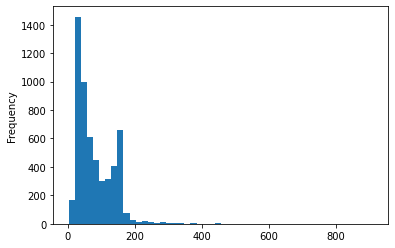

In [11]:
msgs['length'].plot(kind = 'hist', bins=50)

In [12]:
msgs[msgs['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [13]:
msgs[msgs['length']==2]['message'].iloc[0]

'Ok'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f90884ec9d0>,
      dtype=object)

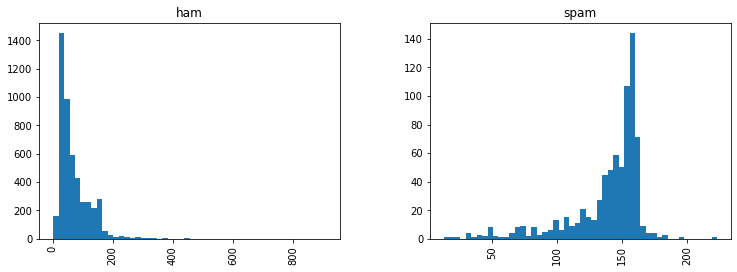

In [14]:
msgs.hist(column = 'length', by = 'label', figsize=(12,4), bins=50)

##Text Preprocessing

In [16]:
#bag of words - each unique word in text will be represented by a number
# every text will have a assigned number

In [17]:
# sequence of characters into sequence of numbers

In [18]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [19]:
import string
mess = 'Sample message! Notice: it has punctuation.'

#check the characters to see if they are punctuation

nopunc = [char for char in mess if char not in string.punctuation]

nopunc = ''.join(nopunc)

In [20]:
nopunc

'Sample message Notice it has punctuation'

In [21]:
from nltk.corpus import stopwords

In [22]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [25]:
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [26]:
text_process('Sample message! Notice: it has punctuation.')

['Sample', 'message', 'Notice', 'punctuation']

In [27]:
msgs.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
#tokenization -  process of converting normal text string to list of tokens

In [29]:
msgs['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [30]:
#normalization - stemming and part of speech

In [31]:
#vectorisation - lemonisation (converting list of token is called vectorisation)

In [32]:
#converting words of each message into list of tokens(lemmas)
#1)term figsize
#2) IDF- inverse document frequency


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(msgs['message'])

In [35]:
print(len(bow_transformer.vocabulary_))

11425


In [36]:
msg4 = msgs['message'][3]

In [37]:
msg4

'U dun say so early hor... U c already then say...'

In [38]:
bow4 = bow_transformer.transform([msg4])

In [39]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [40]:
print(bow_transformer.get_feature_names()[10558])

tonights


In [41]:
msgs_bow = bow_transformer.transform(msgs['message'])

In [42]:
msgs_bow.shape

(5572, 11425)

In [43]:
msgs_bow.nnz

50548

##TFIDF operation

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
tfidf_transformer = TfidfTransformer().fit(msgs_bow)

In [46]:
tfidf4 = tfidf_transformer.transform(bow4)

In [47]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [48]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [49]:
#lets transform the entire bag of words into tfidf

In [50]:
msgs_tfidf = tfidf_transformer.transform(msgs_bow)

In [51]:
print(msgs_tfidf.shape)

(5572, 11425)


In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
spam_detect_model = MultinomialNB().fit(msgs_tfidf,msgs['label'])

In [54]:
print("predicted", spam_detect_model.predict(tfidf4)[0])
print("expected",msgs.label[3])

predicted ham
expected ham


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
msg_train, msg_test, label_train, label_test = train_test_split(msgs['message'], msgs['label'], test_size=0.2)

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer = text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
])

In [59]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9080017200>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [60]:
prediction = pipeline.predict(msg_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(prediction, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1015
        spam       0.72      1.00      0.84       100

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115



In [63]:
confusion_matrix(prediction, label_test)

array([[977,  38],
       [  0, 100]])